<a href="https://colab.research.google.com/github/Yogender-Singh/Notebooks/blob/main/detecting_and_ocring_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!add-apt-repository -y ppa:alex-p/tesseract-ocr-devel
!apt-get update
!apt-get install tesseract-ocr
!pip install pytesseract

### Import Packages

In [2]:
# import the necessary packages
import matplotlib.pyplot as plt
import pytesseract
import cv2

### Function to display images in Jupyter Notebooks and Google Colab

In [3]:
def plt_imshow(title, image):
	# convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### OCR'ing Digits with Tesseract and OpenCV

In [7]:
# https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.acko.com%2Fhealth-insurance%2Fcoronavirus-helpline-india-official-phone-numbers-list%2F&psig=AOvVaw1UAKQ2yNsiS2cDiWwhfe7y&ust=1684327048363000&source=images&cd=vfe&ved=0CBEQjRxqFwoTCMj1g63t-f4CFQAAAAAdAAAAABAh
# https://images.ctfassets.net/uwf0n1j71a7j/4ejmhSK83t0Y3CvL86qIZl/93df5c9df71a6f4ff490c2a78a83bb2b/coronavirus-helpline-india-official-phone-numbers-list.png?fm=webp&w=1200&q=75
args = {
	"image": "/content/helpdesk.png",
	"digits": 1,
}

491-11-23978046

1075



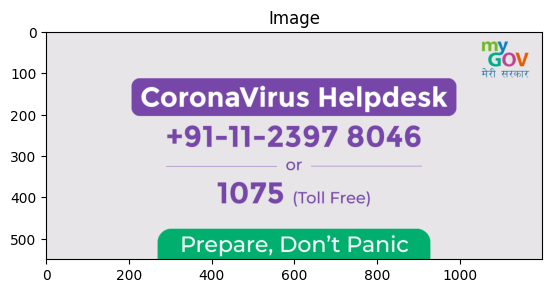

In [8]:
# load the input image, convert it from BGR to RGB channel ordering,
# and initialize our Tesseract OCR options as an empty string
image = cv2.imread(args["image"])
rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
options = ""

# check to see if *digit only* OCR should be performed, and if so,
# update our Tesseract OCR options
if args["digits"] > 0:
	options = "outputbase digits"

# OCR the input image using Tesseract
text = pytesseract.image_to_string(rgb, config=options)
print(text)
plt_imshow("Image", image)